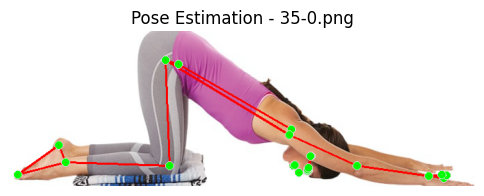

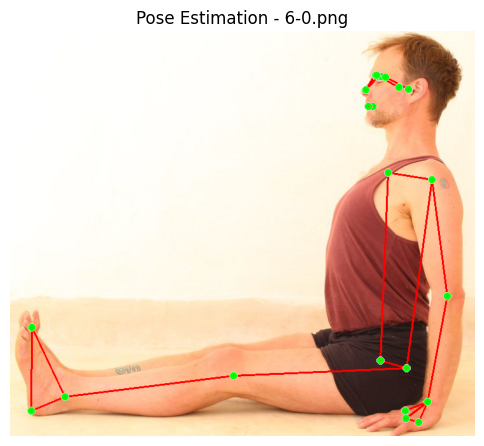

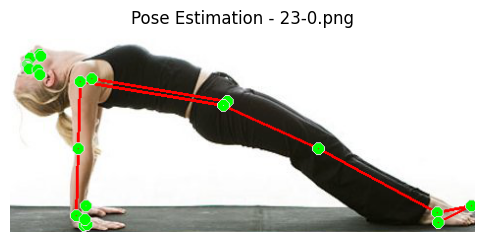

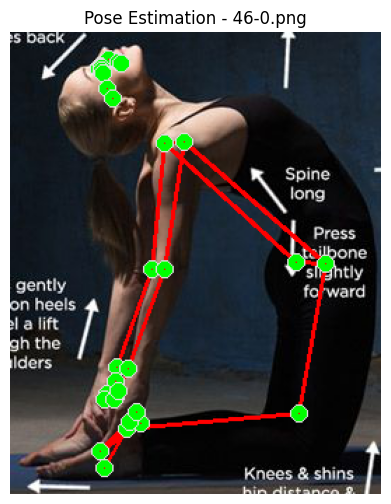

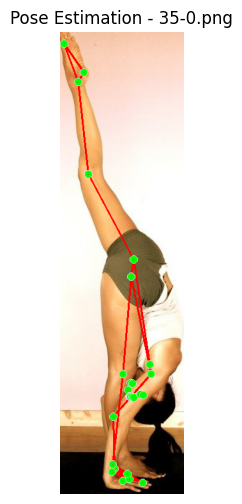

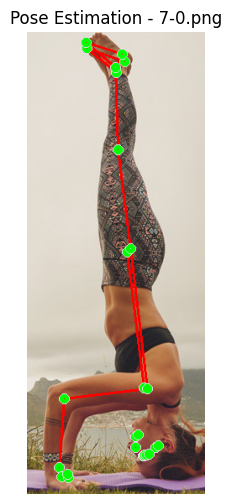

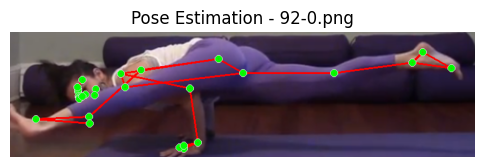

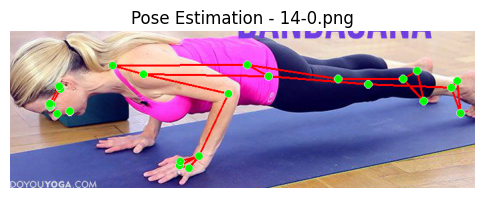

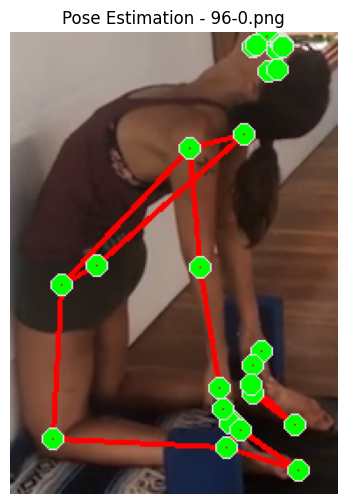

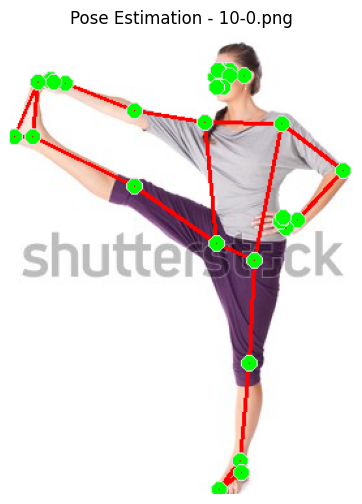

In [1]:
import os
import cv2
import random
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

#Paso1
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

#Paso2
dataset_folder = "dataset"
all_images = []
for pose_folder in os.listdir(dataset_folder):
    pose_path = os.path.join(dataset_folder, pose_folder)
    if os.path.isdir(pose_path):
        images = [os.path.join(pose_path, img) for img in os.listdir(pose_path) if img.endswith(('.jpg', '.png'))]
        all_images.extend(images)
#Paso3
selected_images = random.sample(all_images, 10)

#Paso4
for img_path in selected_images:
    image = cv2.imread(img_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)
    
    #Paso5
    if results.pose_landmarks:
        annotated_image = image_rgb.copy()
        mp_drawing.draw_landmarks(
            annotated_image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=3, circle_radius=3),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2)
        )           
        plt.figure(figsize=(6, 6))
        plt.imshow(annotated_image)
        plt.title(f'Pose Estimation - {os.path.basename(img_path)}')
        plt.axis('off')
        plt.show()
#Paso6
pose.close()


In [2]:
!pip freeze


absl-py==2.1.0
anyio @ file:///C:/ci/anyio_1644481921011/work/dist
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci/argon2-cffi-bindings_1644551690056/work
asttokens @ file:///opt/conda/conda-bld/asttokens_1646925590279/work
astunparse==1.6.3
attrs @ file:///opt/conda/conda-bld/attrs_1642510447205/work
Babel @ file:///tmp/build/80754af9/babel_1620871417480/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
beautifulsoup4 @ file:///C:/ci/beautifulsoup4_1650293025093/work
bleach @ file:///opt/conda/conda-bld/bleach_1641577558959/work
brotlipy==0.7.0
certifi @ file:///C:/b/abs_8a944p1_gn/croot/certifi_1738623753421/work/certifi
cffi @ file:///C:/ci_310/cffi_1642682485096/work
charset-normalizer @ file:///tmp/build/80754af9/charset-normalizer_1630003229654/work
click @ file:///D:/bld/click_1734858834134/work
cloudpickle @ file:///home/conda/feedstock_root/build_artifacts/cloudpickle_1736947526808/work
colorama

In [2]:
'''
-Paso 1: Inicialización del Modelo MediaPipe Pose
Se crea un objeto Pose de MediaPipe, que detectará los puntos clave del cuerpo en cada imagen.
static_image_mode=True: Indica que se procesan imágenes individuales.
min_detection_confidence=0.5: Establece la confianza mínima para detectar la pose.
También se define mp_drawing para dibujar el esqueleto sobre la imagen.

-Paso 2: Obtener Todas las Imágenes del Dataset
El código recorre todas las carpetas dentro de dataset/, verifica que realmente sean carpetas y almacena las rutas de todas las imágenes en una lista (all_images).

-Paso 3: Seleccionar 10 Imágenes Aleatorias
Si hay más de 10 imágenes disponibles, se eligen 10 aleatoriamente con random.sample(). Si hay menos, se seleccionan todas.

-Paso 4: Procesar Cada Imagen Seleccionada
Para cada imagen:
    Se carga con cv2.imread().
    Se convierte a formato RGB (cv2.COLOR_BGR2RGB) para que MediaPipe pueda procesarla correctamente.
    Se usa pose.process(image_rgb), que devuelve una lista de puntos clave si se detecta una persona en la imagen.

-Paso 5: Dibujar el Esqueleto Sobre la Imagen
Si se detecta una pose:
    Se copian los datos de la imagen original.
    Se dibujan los puntos clave en verde.
    Se dibujan las conexiones entre puntos (brazos, piernas, torso) en rojo.

-Paso 6: Cerrar el Modelo de MediaPipe
Al finalizar, se libera el modelo con pose.close().
'''

'\n-Paso 1: Inicialización del Modelo MediaPipe Pose\nSe crea un objeto Pose de MediaPipe, que detectará los puntos clave del cuerpo en cada imagen.\nstatic_image_mode=True: Indica que se procesan imágenes individuales.\nmin_detection_confidence=0.5: Establece la confianza mínima para detectar la pose.\nTambién se define mp_drawing para dibujar el esqueleto sobre la imagen.\n\n-Paso 2: Obtener Todas las Imágenes del Dataset\nEl código recorre todas las carpetas dentro de dataset/, verifica que realmente sean carpetas y almacena las rutas de todas las imágenes en una lista (all_images).\n\n-Paso 3: Seleccionar 10 Imágenes Aleatorias\nSi hay más de 10 imágenes disponibles, se eligen 10 aleatoriamente con random.sample(). Si hay menos, se seleccionan todas.\n\n-Paso 4: Procesar Cada Imagen Seleccionada\nPara cada imagen:\n    Se carga con cv2.imread().\n    Se convierte a formato RGB (cv2.COLOR_BGR2RGB) para que MediaPipe pueda procesarla correctamente.\n    Se usa pose.process(image_rgb)

In [2]:
import os
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd

mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

dataset_folder = "dataset"
data = []
labels = []

for pose_folder in os.listdir(dataset_folder):
    pose_path = os.path.join(dataset_folder, pose_folder)
    if os.path.isdir(pose_path):
        for img_name in os.listdir(pose_path):
            if img_name.endswith(('.jpg', '.png')):
                img_path = os.path.join(pose_path, img_name)
                image = cv2.imread(img_path)
                image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                results = pose.process(image_rgb)

                if results.pose_landmarks:
                    landmarks = []
                    for lm in results.pose_landmarks.landmark:
                        landmarks.extend([lm.x, lm.y, lm.z])

                    data.append(landmarks)
                    labels.append(pose_folder)

df = pd.DataFrame(data)
df['label'] = labels
df.to_csv("landmarks_dataset.csv", index=False)

print("Landmarks guardados en landmarks_dataset.csv")

pose.close()


Landmarks guardados en landmarks_dataset.csv


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LSTM
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# 🔹 1️⃣ Cargar datos desde CSV
csv_file = "landmarks_dataset.csv"
df = pd.read_csv(csv_file, header=None)

# 🔹 2️⃣ Separar características (X) y etiquetas (y)
X = df.iloc[:, :-1].values  
y = df.iloc[:, -1].values   

# 🔹 3️⃣ Convertir etiquetas a números
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(np.unique(y_encoded))

# 🔹 4️⃣ Normalizar los datos con MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 5️⃣ Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# 🔹 6️⃣ Ajustar forma para LSTM
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# 🔹 7️⃣ Definir modelo mejorado con 2 LSTM
model = Sequential([
    BatchNormalization(input_shape=(1, X_train.shape[2])),
    LSTM(128, return_sequences=True),  # Primera capa LSTM
    Dropout(0.3),
    LSTM(64, return_sequences=False),  # Segunda capa LSTM
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

# 🔹 8️⃣ Compilar con optimizador ajustado
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 🔹 9️⃣ Entrenar con más épocas y callbacks
callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[callback])

# 🔹 🔟 Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Precisión en test: {test_acc:.2f}")

# 🔹 Guardar el modelo mejorado
model.save("modelo_pose_mejorado.h5")

# 🔹 Guardar el scaler usado para la normalización
import joblib
joblib.dump(scaler, 'scaler.pkl')


C:\Users\USUARIO\miniconda3\lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.0169 - loss: 4.6548 - val_accuracy: 0.0288 - val_loss: 4.4976 - learning_rate: 0.0010
Epoch 2/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0420 - loss: 4.1214 - val_accuracy: 0.0576 - val_loss: 4.2203 - learning_rate: 0.0010
Epoch 3/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0556 - loss: 3.8176 - val_accuracy: 0.0603 - val_loss: 3.9752 - learning_rate: 0.0010
Epoch 4/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0813 - loss: 3.6696 - val_accuracy: 0.1151 - val_loss: 3.6504 - learning_rate: 0.0010
Epoch 5/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0993 - loss: 3.5022 - val_accuracy: 0.1430 - val_loss: 3.3218 - learning_rate: 0.0010
Epoch 6/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1286 - loss: 3.3189 - val_accuracy: 0.1817 - val_loss: 3.0976 - learning_rate: 0.0010
Epoch 7/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1352 - loss: 3

139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4942 - loss: 1.6490 - val_accuracy: 0.6133 - val_loss: 1.4750 - learning_rate: 0.0010
Epoch 45/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5201 - loss: 1.5834 - val_accuracy: 0.6043 - val_loss: 1.4663 - learning_rate: 0.0010
Epoch 46/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4965 - loss: 1.6312 - val_accuracy: 0.5989 - val_loss: 1.4683 - learning_rate: 0.0010
Epoch 47/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4998 - loss: 1.5695 - val_accuracy: 0.6061 - val_loss: 1.4561 - learning_rate: 0.0010
Epoch 48/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5010 - loss: 1.5724 - val_accuracy: 0.6223 - val_loss: 1.4343 - learning_rate: 0.0010
Epoch 49/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4995 - loss: 1.5719 - val_accuracy: 0.6331 - val_loss: 1.4333 - learning_rate: 0.0010
Epoch 50/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5126 - loss: 1.5247 

139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6070 - loss: 1.2002 - val_accuracy: 0.6682 - val_loss: 1.2857 - learning_rate: 2.5000e-04
Epoch 88/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6259 - loss: 1.1417 - val_accuracy: 0.6763 - val_loss: 1.2724 - learning_rate: 2.5000e-04
Epoch 89/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6130 - loss: 1.2107 - val_accuracy: 0.6808 - val_loss: 1.2715 - learning_rate: 2.5000e-04
Epoch 90/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6108 - loss: 1.2016 - val_accuracy: 0.6790 - val_loss: 1.2659 - learning_rate: 2.5000e-04
Epoch 91/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6339 - loss: 1.1216 - val_accuracy: 0.6718 - val_loss: 1.2782 - learning_rate: 2.5000e-04
Epoch 92/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6140 - loss: 1.2010 - val_accuracy: 0.6664 - val_loss: 1.2806 - learning_rate: 2.5000e-04
Epoch 93/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy:

Precisión en test: 0.67


['scaler.pkl']

In [2]:
import os
import cv2
import mediapipe as mp
import numpy as np
import tensorflow as tf
import joblib

# 🔹 1️⃣ Cargar el modelo guardado
model = tf.keras.models.load_model("modelo_pose_mejorado.h5")

# 🔹 2️⃣ Cargar el scaler guardado
scaler = joblib.load('scaler.pkl')

# 🔹 3️⃣ Cargar las subcarpetas del dataset como los nombres de las poses (sin ordenar)
dataset_folder = "dataset"
pose_names = os.listdir(dataset_folder)  # Ahora no ordenamos las carpetas, así coinciden con el CSV

# 🔹 4️⃣ Inicializar MediaPipe y otras configuraciones
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# 🔹 5️⃣ Cargar la nueva imagen que deseas predecir
img_path = "fotoej.jfif"  # Pon la ruta de tu imagen aquí
image = cv2.imread(img_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 🔹 6️⃣ Procesar la imagen para extraer landmarks
results = pose.process(image_rgb)

if results.pose_landmarks:
    # Extraer los landmarks
    landmarks = []
    for lm in results.pose_landmarks.landmark:
        landmarks.extend([lm.x, lm.y, lm.z])

    # 🔹 7️⃣ Escalar los landmarks para que tengan el mismo formato que los datos de entrenamiento
    landmarks_scaled = scaler.transform([landmarks])  # Escalar el landmark como una fila (1, 99)

    # 🔹 8️⃣ Ajustar la forma de los datos para que coincidan con el formato del modelo (1, 1, 99)
    landmarks_scaled = landmarks_scaled.reshape(1, 1, 99)  # Cambiar la forma de (1, 99) a (1, 1, 99)

    # 🔹 9️⃣ Hacer la predicción
    predictions = model.predict(landmarks_scaled)

    # 🔟 Convertir la predicción a la clase correspondiente
    predicted_class = np.argmax(predictions, axis=1)

    # 1️⃣1️⃣ Obtener el nombre de la pose correspondiente a la clase predicha
    predicted_pose = pose_names[predicted_class[0]]  # Usar el nombre exacto de la subcarpeta

    # 🔹 1️⃣2️⃣ Mostrar el resultado con el nombre de la pose
    print(f"Predicción de la pose: {predicted_pose}")  # Aquí te devolverá el nombre de la pose
else:
    print("No se detectaron landmarks en la imagen.")

# Cerrar el objeto pose después de su uso
pose.close()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
Predicción de la pose: bakasana
